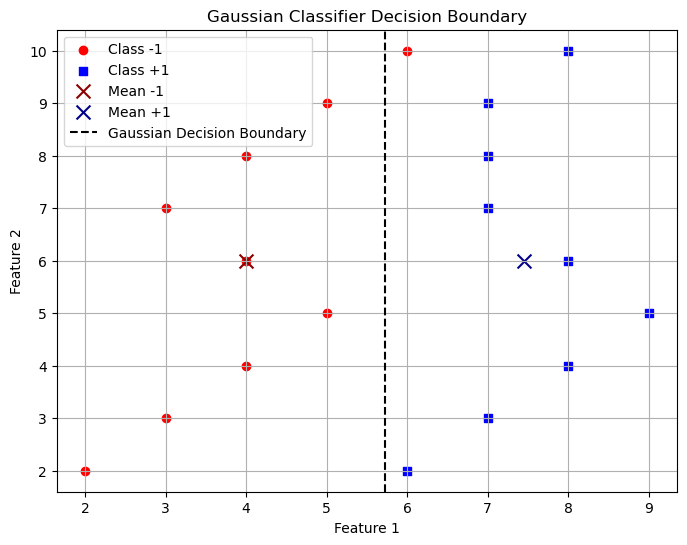

Gaussian Classifier Error Rate: 5.56%


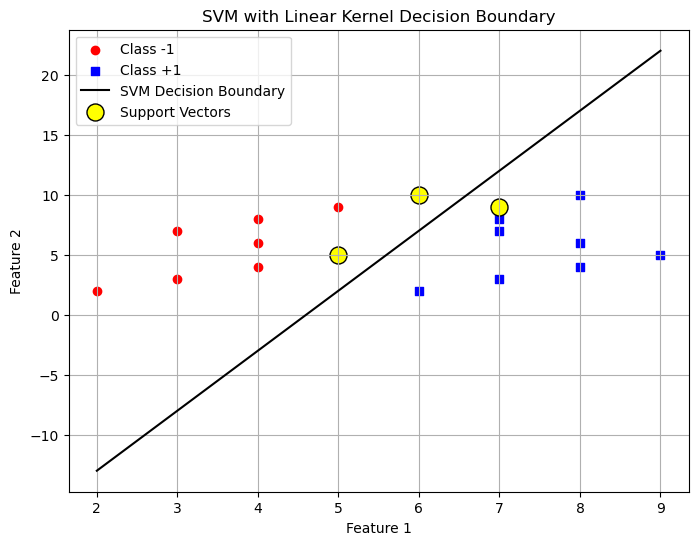

SVM (Linear Kernel) Error Rate: 0.00%
SVM (RBF Kernel) Error Rate: 0.00%


In [1]:
#Steps in the Code:

# Load and visualize the dataset. 

# Compute the mean values for Class -1 and Class +1.

# Plot the Gaussian classifier decision boundary assuming  \Sigma = \sigma^2 I .

# Compute the Gaussian classifier error rate.

# Train and visualize a Support Vector Machine (SVM) with a linear kernel.

# Compute the SVM error rate.

# Train and evaluate an SVM with an RBF kernel.

import numpy as np

import matplotlib.pyplot as plt

from sklearn.svm import SVC



# Define the dataset
                                                                                                                                                                                                                                                                                                    
class_neg1 = np.array([

    [2, 2], [3, 3], [4, 4], [5, 5], [4, 6], 

    [3, 7], [4, 8], [5, 9], [6, 10]

])



class_pos1 = np.array([

    [6, 2], [7, 3], [8, 4], [9, 5], [8, 6], 

    [7, 7], [7, 8], [7, 9], [8, 10]

])



# Compute means

mean_neg1 = np.mean(class_neg1, axis=0)

mean_pos1 = np.mean(class_pos1, axis=0)



# Plot dataset

plt.figure(figsize=(8, 6))

plt.scatter(class_neg1[:, 0], class_neg1[:, 1], color='red', marker='o', label='Class -1')

plt.scatter(class_pos1[:, 0], class_pos1[:, 1], color='blue', marker='s', label='Class +1')



# Plot mean points

plt.scatter(mean_neg1[0], mean_neg1[1], color='darkred', marker='x', s=100, label='Mean -1')

plt.scatter(mean_pos1[0], mean_pos1[1], color='darkblue', marker='x', s=100, label='Mean +1')



# Gaussian Classifier Decision Boundary (Linear due to Σ = σ²I)

decision_x = (mean_neg1[0] + mean_pos1[0]) / 2  # Midpoint of means

plt.axvline(decision_x, color='black', linestyle='--', label='Gaussian Decision Boundary')



plt.xlabel('Feature 1')

plt.ylabel('Feature 2')

plt.legend()

plt.title('Gaussian Classifier Decision Boundary')

plt.grid()

plt.show()



# Compute Gaussian Classifier Error Rate

errors_neg1 = np.sum(class_neg1[:, 0] > decision_x)  # Misclassified -1 class

errors_pos1 = np.sum(class_pos1[:, 0] < decision_x)  # Misclassified +1 class

gaussian_error_rate = (errors_neg1 + errors_pos1) / (len(class_neg1) + len(class_pos1))

print(f"Gaussian Classifier Error Rate: {gaussian_error_rate:.2%}")



# Train SVM with Linear Kernel

X = np.vstack((class_neg1, class_pos1))

y = np.hstack((-np.ones(len(class_neg1)), np.ones(len(class_pos1))))

svm_linear = SVC(kernel='linear', C=1e6)

svm_linear.fit(X, y)



# Plot SVM Decision Boundary

w_svm = svm_linear.coef_[0]

b_svm = svm_linear.intercept_[0]

x_vals = np.linspace(2, 9, 100)

y_vals_svm = (-w_svm[0] * x_vals - b_svm) / w_svm[1]

support_vectors = svm_linear.support_vectors_



plt.figure(figsize=(8, 6))

plt.scatter(class_neg1[:, 0], class_neg1[:, 1], color='red', marker='o', label='Class -1')

plt.scatter(class_pos1[:, 0], class_pos1[:, 1], color='blue', marker='s', label='Class +1')

plt.plot(x_vals, y_vals_svm, 'k-', label='SVM Decision Boundary')

plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='yellow', edgecolors='black', marker='o', s=150, label='Support Vectors')



plt.xlabel('Feature 1')

plt.ylabel('Feature 2')

plt.legend()

plt.title('SVM with Linear Kernel Decision Boundary')

plt.grid()

plt.show()



# Compute SVM Error Rate (Linear Kernel)

svm_predictions = svm_linear.predict(X)

svm_error_rate = np.mean(svm_predictions != y)

print(f"SVM (Linear Kernel) Error Rate: {svm_error_rate:.2%}")



# Train SVM with RBF Kernel

svm_rbf = SVC(kernel='rbf', C=1e6)

svm_rbf.fit(X, y)

svm_rbf_predictions = svm_rbf.predict(X)

svm_rbf_error_rate = np.mean(svm_rbf_predictions != y)

print(f"SVM (RBF Kernel) Error Rate: {svm_rbf_error_rate:.2%}")